In [1]:
#Esto es solamente para que Jupyter pueda encontrar las librerías necesarias
import sys
sys.path.append('C:\\Users\\Test\\AppData\\Local\\Programs\\Python\\Python37-32\\python37.zip')
sys.path.append('C:\\Users\\Test\\AppData\\Local\\Programs\\Python\\Python37-32\\DLLs')
sys.path.append('C:\\Users\\Test\\AppData\\Local\\Programs\\Python\\Python37-32\\lib')
sys.path.append('C:\\Users\\Test\\AppData\\Local\\Programs\\Python\\Python37-32')
sys.path.append('C:\\Users\\Test\\AppData\\Local\\Programs\\Python\\Python37-32\\lib\\site-packages')

In [2]:
from scipy import random
from statistics import mean
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as plt
import itertools
import getdist
import pandas as pd
import constants
import distance

In [60]:
def lnL(model, data, sigmaT, theory, theta):
    return -0.5 * np.sum(((theory - model(data, theta)))**2/sigmaT**2)

def prior(model, sigmaT, theory, theta):
    totalSum = 0
    p = np.zeros(2)
    inf = [theory[0] - 3, theory[1] - 3]
    sup = [theory[0] + 3, theory[1] + 3]
    
    for i in range(2):
        if inf[i] < theta[i] < sup[i]:
            p[i] = -1 * np.log(sup[i] - inf[i])
        else:
            p[i] = 0
    
    return sum(p)
    
#def monteCarloN(model, data, sigmaT, sigmaP, theory, p0, chains, likelihood):
def monteCarloN(model, data, sigmaT, sigmaP, theory, p0, chains, prior, likelihood):
    
    np.random.seed(500)
    acceptance = np.zeros(chains)
    chainList = []
        
    for i in range(0, chains):
        
        chain = []
        #L0 -> lnPost
        #lnPost = (likelihood(model, data, sigmaT, theory, p0[i]) + prior(model, sigmaT, theory, p0[i]))
        lnPost = likelihood(model, data, sigmaT, theory, p0[i]) + prior(model, sigmaT, theory, p0[i])
        chain.append([p0[i], lnPost])

        for j in range(0, NMAX):
            
            newp = []
            
            for index, value in enumerate(p0[i]): newp.append(sigmaP[index] * np.random.randn() + value)   
                
            newL = likelihood(model, data, sigmaT, theory, newp) + prior(model, sigmaT, theory, newp)

            if(newL > lnPost):
                chain.append([newp, newL])
                p0[i] = newp
                lnPost = newL
                acceptance[i] += 1
                
            elif(newL - lnPost > np.random.randn()): 
                chain.append([newp, newL])
                acceptance[i] += 1

            else: chain.append([newp, newL])
                
        chainList.append(chain)
            
    return [chainList, acceptance]
            
def line(x, theta):
    return theta[0]*x + theta[1]

Mejores Valores:
Cadena 1:
	 m = 2.004486841973101	 b = 2.907933064337403
	 Fracción de Aceptación: 0.0158
Cadena 2:
	 m = 1.7731886611294583	 b = 2.835157794549055
	 Fracción de Aceptación: 0.0121
Cadena 3:
	 m = 2.0907788828396314	 b = 3.1266435135291077
	 Fracción de Aceptación: 0.0073
Cadena 4:
	 m = 2.0002828261309973	 b = 2.9980553983615157
	 Fracción de Aceptación: 0.015


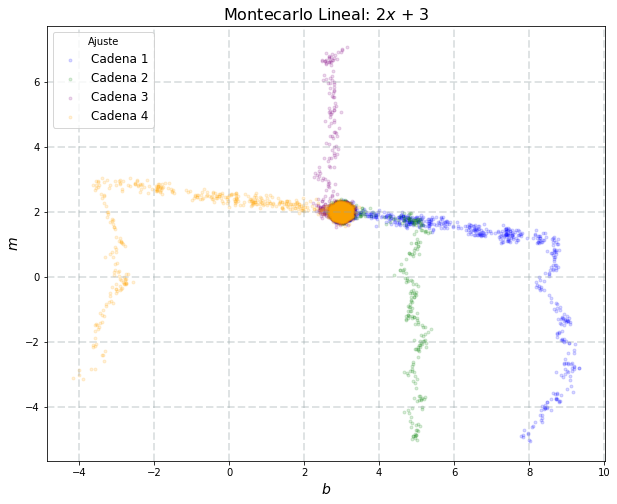

In [151]:
colors = ['blue', 'green', 'purple', 'orange', 'red', 'yellow']

NMAX = 10000
size = 1000
chains = 4
theory = [2, 3]
x = np.linspace(0, 10, size)
y = theory[0]*x + theory[1]
sigmaP = [0.1, 0.1]
sigmaT = 0.1 * np.ones(size)
p0 = [[-5, 8], [-5, 5], [7, 3], [-3, -4]]

chainList = monteCarloN(line, x, sigmaT, sigmaP, y, p0, chains, prior, lnL)
xdotsList, ydotsList = [], []
fullDataSet = []

#Acomodo del resultado del MCMC en arreglos correspondientes
for chain in chainList[0]:
    dots, likelihoods = [], []
    xdots, ydots = [], []

    for i in range(0, len(chain)):
        dots.append(chain[i][0])
        likelihoods.append(chain[i][1])

    for i in range(0, len(dots)):
        xdots.append(dots[i][0])
        ydots.append(dots[i][1])
        
    fullDataSet.append(dots[5000:])    
    xdotsList.append(xdots)
    ydotsList.append(ydots)
    
#Se elije índice del mejor par de valores
bestIndex = likelihoods.index(max(likelihoods))

fig, ax0 = plt.subplots(figsize=(10, 8))

for i in range(0, len(chainList[0])):
    plt.scatter(ydotsList[i], xdotsList[i], color = colors[i], alpha = 0.15, marker = '.',  label = 'Cadena ' + str(i + 1))
    
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('$m$', fontsize = 14)
plt.title('Montecarlo Lineal: ' + str(theory[0]) + '$x$ ' + '+ ' + str(theory[1]), fontsize = 16)
plt.legend(title = 'Ajuste', loc = 'upper left', fontsize = 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)


print('Mejores Valores:')
for i in range(0, chains):
    print('Cadena ' + str(i + 1) + ':')
    print('\t m = ' + str(xdotsList[i][bestIndex]) + '\t b = ' + str(ydotsList[i][bestIndex]))
    print('\t Fracción de Aceptación: ' + str(chainList[1][i]/NMAX))

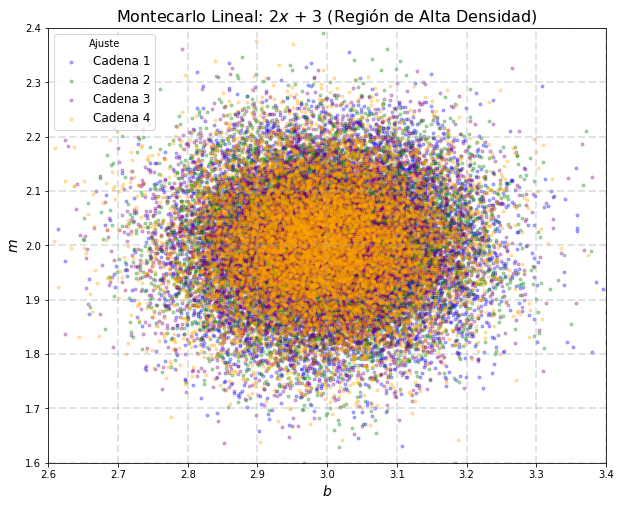

In [122]:
fig, ax0 = plt.subplots(figsize=(10, 8))

for i in range(0, len(chainList[0])):
    plt.scatter(ydotsList[i], xdotsList[i], color = colors[i], alpha = 0.3, marker = '.',  label = 'Cadena ' + str(i + 1))
    
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('$m$', fontsize = 14)
plt.ylim((1.6, 2.4))
plt.xlim((2.6, 3.4))
plt.title('Montecarlo Lineal: ' + str(theory[0]) + '$x$ ' + '+ ' + str(theory[1]) + ' (Región de Alta Densidad)', fontsize = 16)
plt.legend(title = 'Ajuste', loc = 'upper left', fontsize = 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)


#  Histogramas de la Región de Alta Densidad

En estos dos primeros histogramas, se descartan los primeros 500 pasos de un total de 10000.

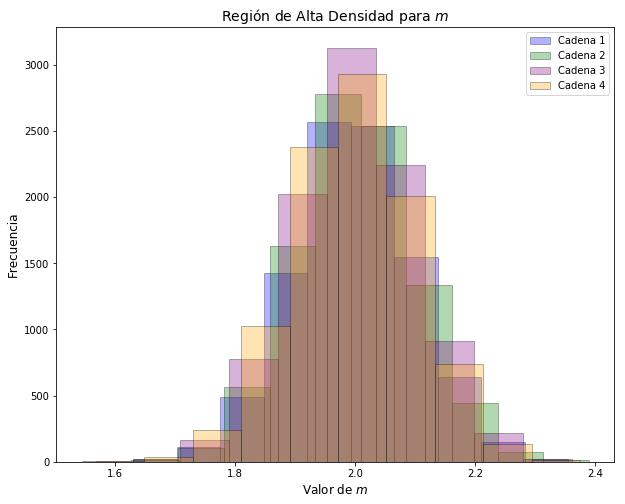

In [123]:
fig, ax0 = plt.subplots(figsize=(10, 8))

plt.xlabel('Valor de $m$', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.title('Región de Alta Densidad para $m$', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.hist(xdotsList[i][500:], color = colors[i], alpha = 0.3, align = 'mid', label = 'Cadena ' + str(i + 1), ec = 'black')

plt.legend()
plt.show()

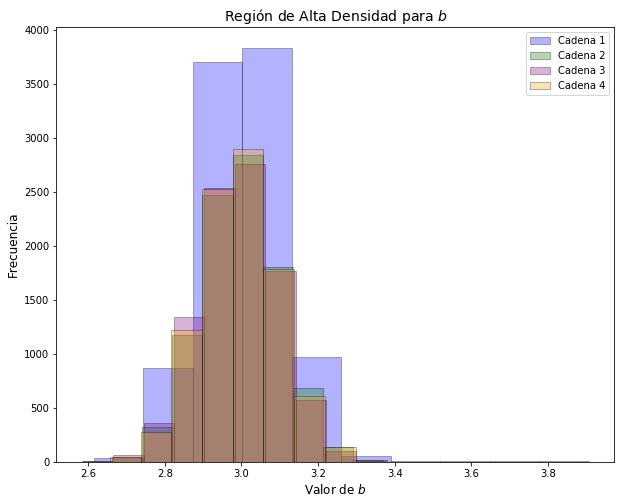

In [124]:
fig, ax0 = plt.subplots(figsize=(10, 8))

plt.xlabel('Valor de $b$', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.title('Región de Alta Densidad para $b$', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.hist(ydotsList[i][500:], color = colors[i], alpha = 0.3, align = 'mid', label = 'Cadena ' + str(i + 1), ec = 'black')

plt.legend()
plt.show()

Ahora se descartan los primeros 1000:

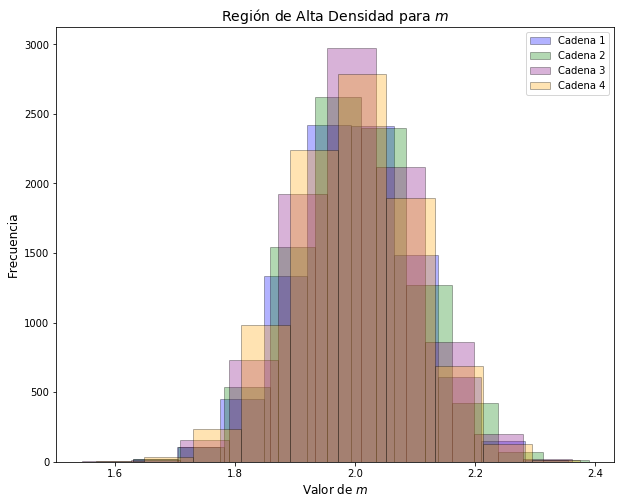

In [125]:
fig, ax0 = plt.subplots(figsize=(10, 8))

plt.xlabel('Valor de $m$', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.title('Región de Alta Densidad para $m$', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.hist(xdotsList[i][1000:], color = colors[i], alpha = 0.3, align = 'mid', label = 'Cadena ' + str(i + 1), ec = 'black')

plt.legend()
plt.show()

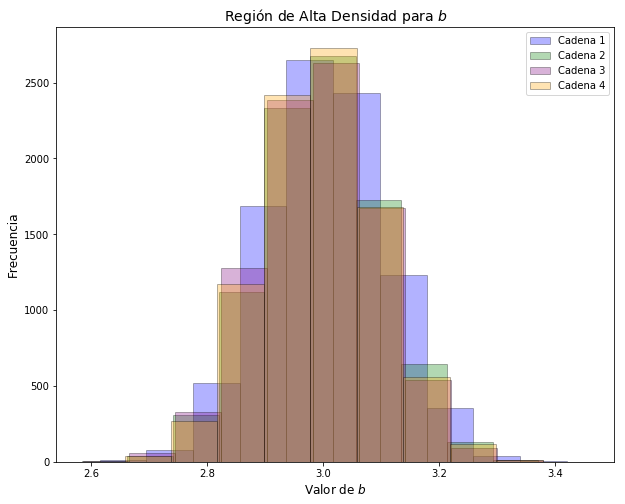

In [126]:
fig, ax0 = plt.subplots(figsize=(10, 8))

plt.xlabel('Valor de $b$', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.title('Región de Alta Densidad para $b$', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.hist(ydotsList[i][1000:], color = colors[i], alpha = 0.3, align = 'mid', label = 'Cadena ' + str(i + 1), ec = 'black')

plt.legend()
plt.show()

Y finalmente se descartan los primeros 5000:

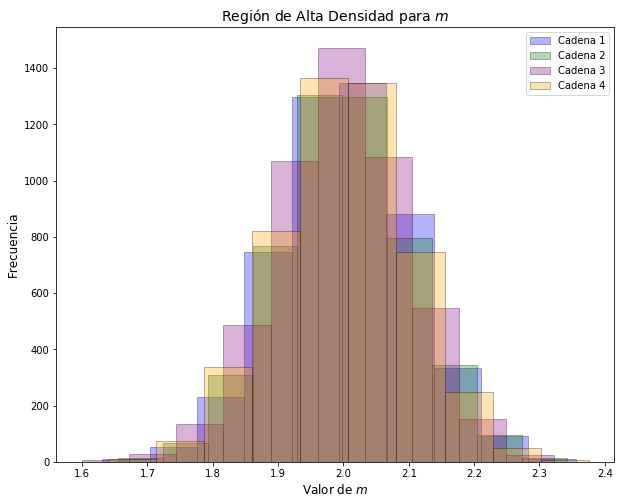

In [127]:
fig, ax0 = plt.subplots(figsize=(10, 8))

plt.xlabel('Valor de $m$', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.title('Región de Alta Densidad para $m$', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.hist(xdotsList[i][5000:], color = colors[i], alpha = 0.3, align = 'mid', label = 'Cadena ' + str(i + 1), ec = 'black')

plt.legend()
plt.show()

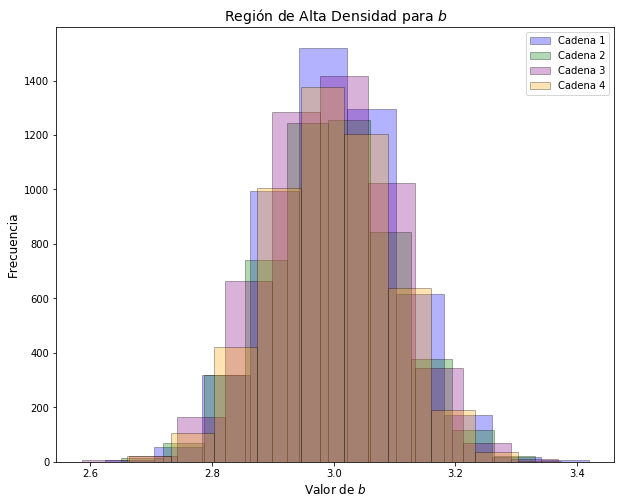

In [128]:
fig, ax0 = plt.subplots(figsize=(10, 8))

plt.xlabel('Valor de $b$', fontsize = 12)
plt.ylabel('Frecuencia', fontsize = 12)
plt.title('Región de Alta Densidad para $b$', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.hist(ydotsList[i][5000:], color = colors[i], alpha = 0.3, align = 'mid', label = 'Cadena ' + str(i + 1), ec = 'black')

plt.legend()
plt.show()

# Valores por Iteración

Ahora se grafican los valores de $m$ y de $b$ en cada iteración.

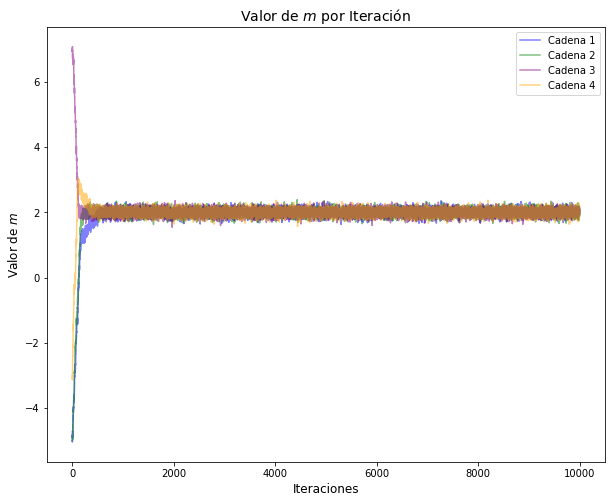

In [130]:
iterations = list(range(0, NMAX + 1))

fig, ax0 = plt.subplots(figsize=(10, 8))

plt.ylabel('Valor de $m$', fontsize = 12)
plt.xlabel('Iteraciones', fontsize = 12)
plt.title('Valor de $m$ por Iteración', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.plot(iterations, xdotsList[i], color = colors[i], alpha = 0.5, label = 'Cadena ' + str(i + 1))

plt.legend()
plt.show()

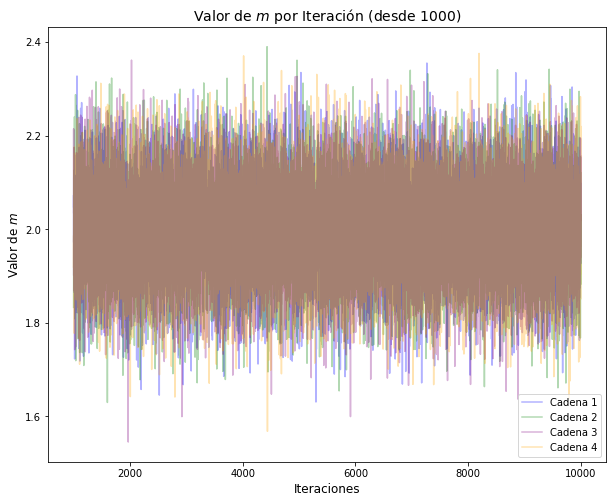

In [131]:
iterations = list(range(1000, NMAX + 1))

fig, ax0 = plt.subplots(figsize=(10, 8))

plt.ylabel('Valor de $m$', fontsize = 12)
plt.xlabel('Iteraciones', fontsize = 12)
plt.title('Valor de $m$ por Iteración (desde 1000)', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.plot(iterations, xdotsList[i][1000:], color = colors[i], alpha = 0.3, label = 'Cadena ' + str(i + 1))

plt.legend()
plt.show()

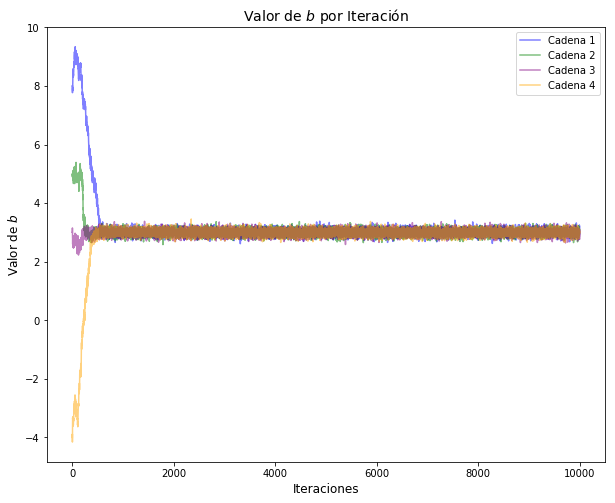

In [132]:
iterations = list(range(0, NMAX + 1))

fig, ax0 = plt.subplots(figsize=(10, 8))

plt.ylabel('Valor de $b$', fontsize = 12)
plt.xlabel('Iteraciones', fontsize = 12)
plt.title('Valor de $b$ por Iteración', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.plot(iterations, ydotsList[i], color = colors[i], alpha = 0.5, label = 'Cadena ' + str(i + 1))

plt.legend()
plt.show()

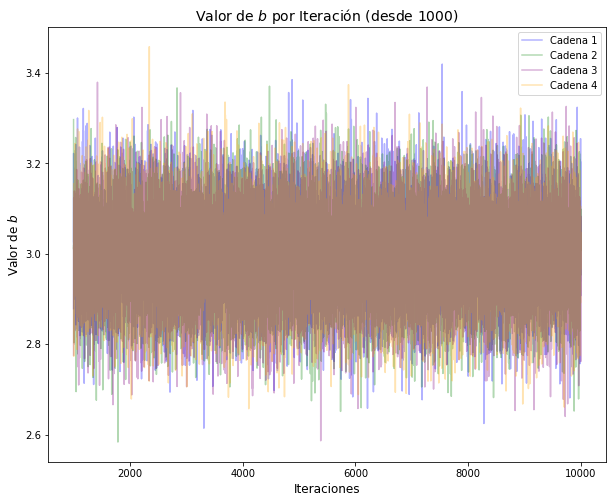

In [133]:
iterations = list(range(1000, NMAX + 1))

fig, ax0 = plt.subplots(figsize=(10, 8))

plt.ylabel('Valor de $b$', fontsize = 12)
plt.xlabel('Iteraciones', fontsize = 12)
plt.title('Valor de $b$ por Iteración (desde 1000)', fontsize = 14)

for i in range(0, len(chainList[0])):
    plt.plot(iterations, ydotsList[i][1000:], color = colors[i], alpha = 0.3, label = 'Cadena ' + str(i + 1))

plt.legend()
plt.show()

# Diagnóstico de Gelman-Rubin

In [134]:
def si2(chain, mean):
    totalSum = 0
    for i in chain: totalSum += (np.asarray(chain) - mean)**2
    return 1/(NMAX - 1) * totalSum

def Bn(chainList, mu):
    totalSum = 0
    for chain in chainList: totalSum += (mean(chain) - mu)**2
    return 1/(chains - 1) * totalSum

In [135]:
m_si2Values, b_si2Values = [], []
mBurned, bBurned =  [], []

for i in range(chains):
    mBurned.append(xdotsList[i][5000:])
    bBurned.append(ydotsList[i][5000:])
    
for chain in range(chains):
    m_si2Values.append(si2(mBurned[i], mean(mBurned[i])))
    b_si2Values.append(si2(bBurned[i], mean(bBurned[i])))
    
m_s2 = np.sum(np.asarray(m_si2Values)**2)/chains
b_s2 = np.sum(np.asarray(b_si2Values)**2)/chains

print(f'Se obtuvo s^2 = {m_s2:.4f} para m y s^2 = {b_s2:.4f} para b, teniendo 4 cadenas y descartando los primeros 5000 datos (50%).')

Se obtuvo s^2 = 0.3803 para m y s^2 = 0.3514 para b, teniendo 4 cadenas y descartando los primeros 5000 datos (50%).


In [19]:
m_mu = mean(list(itertools.chain.from_iterable(mBurned)))
b_mu = mean(list(itertools.chain.from_iterable(bBurned)))

m_sigmaHat = (NMAX - 1)/NMAX * m_s2 + Bn(mBurned, m_mu)
b_sigmaHat = (NMAX - 1)/NMAX * b_s2 + Bn(bBurned, b_mu)

mR = np.sqrt(m_sigmaHat/m_s2)
bR = np.sqrt(b_sigmaHat/b_s2)

print(f'Se obtuvo R = {mR} para m y R = {bR} para b.')

Se obtuvo R = 0.9999523931315653 para m y R = 0.9999648444082248 para b.


# Triangle Plot

In [153]:
fullDataSet = list(itertools.chain.from_iterable(fullDataSet))

Removed no burn in


C:\Users\Test\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
C:\Users\Test\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


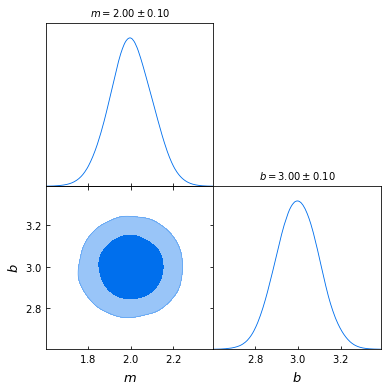

In [50]:
trPlot = plots.get_subplot_plotter(subplot_size=3)
samples = MCSamples(samples = np.array(fullDataSet), labels = ['m', 'b'], names = ['m', 'b'])
trPlot.triangle_plot(samples, filled=True, title_limit=1)

# Histograma 2D

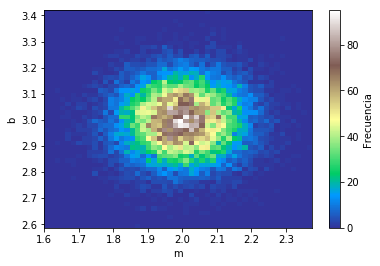

In [134]:
xdots, ydots = [], []

for pair in fullDataSet:
    xdots.append(pair[0])
    ydots.append(pair[1])
    
plt.hist2d(xdots, ydots, bins = 50, cmap = 'terrain')
plt.colorbar(label = 'Frecuencia')
plt.xlabel('m')
plt.ylabel('b')
plt.show()

# Intervalos de Confianza

In [71]:
letters = ['m', 'b']
parameters = [[], []]
percentiles = []

for pair in fullDataSet:
    for i, value in enumerate(pair):
        parameters[i].append(value)
        
for i in range(len(fullDataSet[0])):
    percentiles.append([])
    percentiles[i].append(np.percentile(parameters[i], 50))
    percentiles[i].append(np.percentile(parameters[i], 16))
    percentiles[i].append(np.percentile(parameters[i], 84))

for aux, value in enumerate(percentiles):
    print(letters[aux] + ' = ' + str(value[0]) + ' ± (' + str(value[0] - value[1]) + ', ' + str(value[2] - value[0]) + ')')

m = 2.0006079282443965 ± (0.09802513113353006, 0.10093387003142151)
b = 2.998110462209184 ± (0.10044555564834878, 0.09991698003823091)
